Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [23]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/Users/ashishkishore/Downloads/archive/car data.csv')

In [24]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [26]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [27]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [29]:
# Checking the distribution of categorical data
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [30]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [31]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,0,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,0,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,0,0


Splitting the data and Target

In [33]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [34]:
print(X)

     Year  Present_Price  Kms_Driven Fuel_Type Seller_Type  Transmission  \
0    2014           5.59       27000    Petrol      Dealer             0   
1    2013           9.54       43000    Diesel      Dealer             0   
2    2017           9.85        6900    Petrol      Dealer             0   
3    2011           4.15        5200    Petrol      Dealer             0   
4    2014           6.87       42450    Diesel      Dealer             0   
..    ...            ...         ...       ...         ...           ...   
296  2016          11.60       33988    Diesel      Dealer             0   
297  2015           5.90       60000    Petrol      Dealer             0   
298  2009          11.00       87934    Petrol      Dealer             0   
299  2017          12.50        9000    Diesel      Dealer             0   
300  2016           5.90        5464    Petrol      Dealer             0   

     Owner  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ..

In [35]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [39]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [41]:
# Print the first few rows of the encoded dataset to check for any remaining categorical columns
print(car_dataset_encoded.head())

# Print the column names
print(car_dataset_encoded.columns)


     Price  Year  Kilometer  Transmission  Length   Width  Height  \
0   505000  2017      87150             0  3990.0  1680.0  1505.0   
1   450000  2014      75000             0  3995.0  1695.0  1555.0   
2   220000  2011      67000             0  3585.0  1595.0  1550.0   
3   799000  2019      37500             0  3995.0  1745.0  1510.0   
4  1950000  2018      69000             0  4735.0  1830.0  1795.0   

   Seating Capacity  Fuel Tank Capacity  Make_BMW  ...  \
0               5.0                35.0         0  ...   
1               5.0                42.0         0  ...   
2               5.0                35.0         0  ...   
3               5.0                37.0         0  ...   
4               7.0                55.0         0  ...   

   Max Torque_95 Nm @ 4000 rpm  Max Torque_96 Nm @ 3000 rpm  \
0                            0                            0   
1                            0                            0   
2                            0                 

In [43]:
# Apply one-hot encoding to categorical columns, including 'Fuel Type', 'Seller Type', etc.
car_dataset_encoded = pd.get_dummies(car_dataset, drop_first=True)

# Ensure that the target column 'Price' is excluded from the encoding process
X = car_dataset_encoded.drop(columns='Selling_Price')  # Features
y = car_dataset_encoded['Selling_Price']  # Target

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)


LinearRegression()

In [44]:
# Check for missing values in the dataset
print(car_dataset_encoded.isnull().sum())

# If there are missing values, you can handle them by either filling them or dropping them
car_dataset_encoded = car_dataset_encoded.fillna(0)  # Filling NaN values with 0


Year                      0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Transmission              0
                         ..
Car_Name_wagon r          0
Car_Name_xcent            0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Length: 106, dtype: int64


In [45]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [46]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [47]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9496973435247789


Visualize the actual prices and Predicted prices

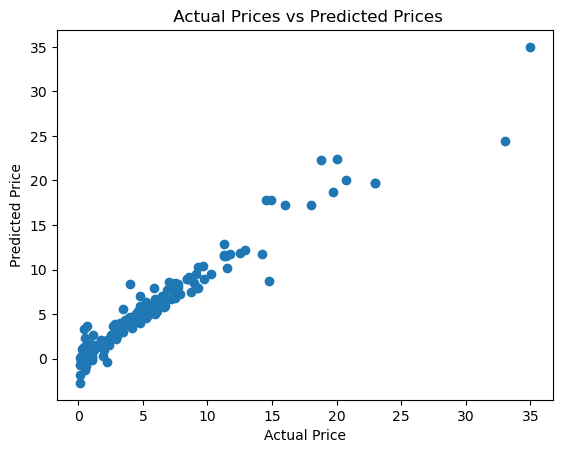

In [48]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [49]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [50]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5995038184035248


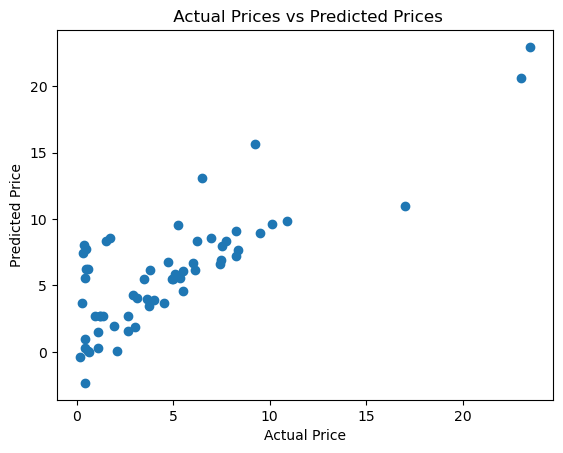

In [51]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [52]:
# loading the linear regression model
lass_reg_model = Lasso()

In [53]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [54]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [55]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.848030286813716


Visualize the actual prices and Predicted prices

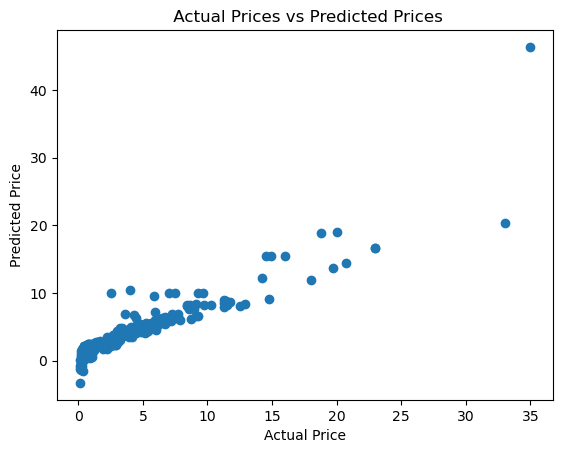

In [56]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [57]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [58]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.798551246128469


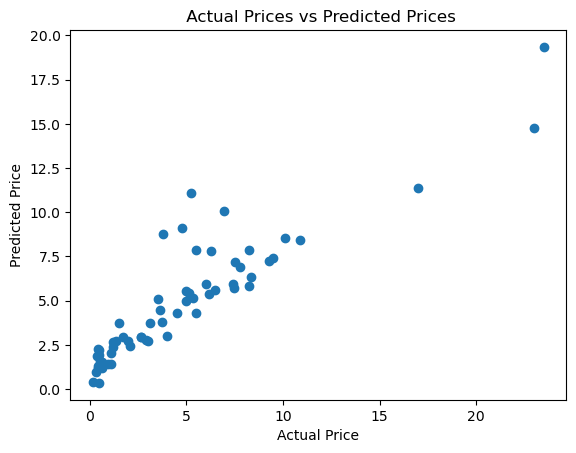

In [59]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()